---
title: "Random Walk in 1D"
authro: Yang Peng
institute: California State University, Northridge
format: 
  html:
    toc: true
    code-fold: false
    page-layout: full
    fig-cap-location: bottom
    number-sections: true
    number-depth: 2
jupyter: python3
---

# Random Walk
A Random Walk can be simply explained as a simulation to proceed to the next step in a randomized manner such that we get a different path of propagation each time. Such a simulation can somewhat describe the motion such as Brownian motion of particles, stock ticker movement, living cell movement in a substrate, etc.

Random walks can be 1D, 2D, 3D,…., etc. with each increase in dimension the motion explained becomes complex but a simulation like this helps a user to have a great visualization and understanding.

The random walk is central to _statistical physics_. It is essential in predicting how fast one gas will diffuse into another, how fast heat will spread in a solid, how big fluctuations in pressure will be in a small container, and many other statistical phenomena. 

Einstein used the random walk to find the size of atoms from the Brownian motion. 

The following python code simulates a 1D random walk: 
- The walk goes along a line, each pace being the same length. 
- Before each step, you flip a coin. 
- If it’s heads, you take one step forward. If it’s tails, you take one step back. 
- The coin is unbiased, so the chances of heads or tails are equal. 

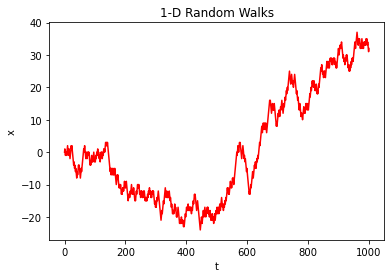

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def Randomwalk1D(n): #n here is the no. of steps that we require
   x = 0
   t = 0
   xlist = [0]
   tlist = [0]
   for i in range (1,n+1):
       step = np.random.uniform(0,1)
       t += 1
       if step < 0.5: # if step is less than 0.5 we move forward    
           x += 1  #moving in positive direction
       if step > 0.5: # if step is greater than 0.5 we move backward
           x += -1 #moving in negative direction
       tlist.append(t)
       xlist.append(x)
   return tlist,xlist
tlist,xlist = Randomwalk1D(1000) #creating an object for the Randomwalk1D class and passing value of n as 100
plt.plot(tlist,xlist,'r-', label = "Randwalk1D") # 'r-' makes the color of the path red
plt.title("1-D Random Walks")
plt.xlabel("t")
plt.ylabel("x")
plt.show()

# The Probability of landing at a particular location
We want to find the probability of landing at a given spot after a given number of $N$ steps, and, in particular, to find how far away the walk on average from where it started. 

Let’s begin with walks of a few steps, each of unit length, and look for a pattern.

**We define the probability function $f_N(n)$ as the probability that in a walk of $N$ steps of unit length, randomly forward or backward along the line, beginning at $0$, we end at point $n$.**

- Since we have to end up somewhere, the sum of these probabilities over $n$ must equal 1. 
- We will only list nonzero probabilities.
- For a walk of no steps, $f_0(0) = 1$
- For a walk of one step, $f_1(1) = 1/2$, $f_{1}(-1) = 1/2$
- For a walk of two steps, $f_2(-2) = 1/4$, $f_2(0) = 1/2$, $f_2(2) = 1/4$.

_It is perhaps helpful in figuring the probabilities to enumerate the coin flip sequences leading to a particular spot._ 

For a three-step walk, HHH will land at 3, HHT, HTH and THH will land at 1, and for the negative numbers just reverse H and T.  There are a total of $2^3 = 8$ different three-step walks, so the probabilities of the different landing spots are: $f_3(\pm 3) = 1/8$, $f_3(\pm 1) = 3/8$. 

For a four-step walk, each configuration of H's and T's has a probability of $(1/2)^4 = 1/16$. So $f_4(\pm 4) = 1/16$, since only one walk HHHH or TTTT gets there. We also have $f_4(\pm 2) = 1/4$, and $f_4(0) = 3/8$.

# Probabilities and Pascal’s Triangle

| $n$ | -5 | -4 | -3 | -2 | -1 | 0 | 1 | 2 | 3 | 4 | 5 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$f_0(n)$| | | | | | 1 | | | | | |
|$2f_1(n)$| | | | |1|   |1| | | | |
|$2^2f_1(n)$||||1||2||1| | | |
|$2^3f_1(n)$|||1||3||3||1| | |
|$2^4f_1(n)$||1||4||6||4||1| |
|$2^5f_1(n)$|1||5||10||10||5||1|

: Pascal's Triangle — every entry is the sum of the two diagonally above

These numbers are in fact the coefficients that appear in the binomial expansion of $(a+b)^N$.  

For example,  the row for $2^5f_5(n)$  mirrors the binomial coefficients: 
$$
(a+b)^5 = a^5 + 5a^4 b + 10 a^3 b^2 + 10 a^2 b^3  + 5ab^4 + b^5.
$$

To see how these binomial coefficients relate to our random walk, we write
$$
(a + b)^5 = (a + b) \times (a+b) \times (a+b) \times (a+b) \times(a+b)
$$
and think of it as _the sum of all products that can be written by choosing one term from each bracket_. There are $2^5 = 32$  such terms (choosing one of two from each of the five brackets), so the coefficient of $a^3b^2$ must be the number of these 32 terms which have just 3 $a$s and 2 $b$s.

But that is the same as the number of different sequences that can be written by rearranging HHHTT, so it is clear that the random walk probabilities and the binomial coefficients are the same sets of numbers (except that the probabilities must of course be divided by 32 so that they add up to one).

# Finding the Probabilities Using the Factorial Function
The efficient way to calculate these coefficients is to use the _factorial_ function.  Suppose we have five distinct objects, A, B, C, D, E.  How many different sequences can we find: ABCDE, ABDCE, BDCAE, etc.?  Well, the first member of the sequence could be any of the five.  The next is one of the remaining four, etc.  So, the total number of different sequences is  $5\times4\times3\times2\times1$  which is called "five factorial" and written $5!$

But how many different sequences can we make with HHHTT? In other words, if we wrote down all $5!$ (that’s 120) of them, how many would really be different?  

Since the two Ts are identical, we wouldn't be able to tell apart sequences in which they had been switched, so that cuts us down from 120 sequences to 60.  But the three Hs are also identical, and if they'd been different there would have been $3! = 6$ different ways of arranging them.  Since they are identical, all six ways come out the same, so we have to divide the 60 by 6, giving only 10 different sequences of 3 Hs and 2 Ts.

This same argument works for any number of Hs and Ts.  The total number of different sequences of  $m$  Hs and  $n$  Ts is  $(m+n)!/(m!n!)$. The two factorials in the denominator coming from the fact that rearranging the Hs among themselves, and the Ts among themselves, gives back the same sequence.

It is also worth mentioning that in the five-step walk ending at $-1$, which has probability $10/2^5$, the fourth step must have been either at 0 or -2.  Glancing at Pascal's Triangle, we see that the probability of a four-step walk ending at 0 is 6/24, and of ending at -2 is $4/2^4$.  In either case, the probability of the next step being to -1 is $1/2$ , so the total probability of reaching  $-1$ in five steps is  $1/2 \times 6/2^4 + 1/2 \times 4/2^4$. So the property of Pascal's triangle that every entry is the sum of the two diagonally above is consistent with our probabilities.

# Picturing the Probability Distribution
It is worth visualizing this probability distribution to get some feel for the random walk. For 5 steps, it looks like the following plot.

<center>
<img src="random_walk_5_step_from_0.png" width=600px title="Title: An elephant" alt="A drawing of an elephant">
</center>

Let's now consider a longer walk. After 100 steps, what is the probability of landing on the integer $n$?

This will happen if the number of forward steps exceeds the number of backward steps by $n$ (which could be a negative number).
That is
$$
n_{forward} - n_{backward} = n, \quad n_{forward} + n_{backward} = 100,
$$
from which we can compute
$$
n_{forward} = \frac{1}{2}(100 + n), \quad n_{backward} = \frac{1}{2}(100 - n).
$$

Note that in the general case, if the total number of steps is $N$, then 
the possible final position $n$ always satisfies that $N \pm n$ is an even number. 
So $N$ and $n$ must have the same even- and odd-ness.

The total number of paths ending at the particular point $n$, from the heads and tails argument above, is 
$$
\frac{N!}{n_{forward}! n_{backward}!} = \frac{100!}{((100+n)/2)!((100-n)/2)!}.
$$

To find the actual probability of ending at $n$ after 100 steps, we need to know what fraction of all possible paths end at $n$.  (Since the coin toss is purely random, we take it all possible paths are equally likely).  The total number of possible 100-step walks is $2^{100}\simeq 1.26\times 10^{30}$.

In the following, we write a Python function that computes the probability $f_N(n)$ of the random walk landing at position $n$, given $N$ steps. 

We shall make use of the following facts:
1. If $|n| > N$, then $f_N(n) = 0$.
2. $f_N(n) = f_N(-n)$.
3. $n$ and $N$ should either be both even or both odd numbers, otherwise $f_N(n) = 0$.

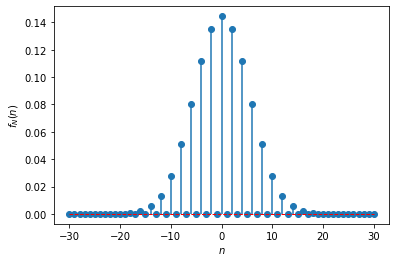

In [82]:
import numpy as np
from math import comb
# The following function compute the probabilities of landing at position n, for N steps.
def find_end_probabilities(N):
    no_total_paths = 2**N
    probability_list = np.zeros(2*N + 1)
    if (N % 2) == 0:
        nlist = np.arange(0,N+1,2)
        no_paths_list = np.zeros_like(nlist)
        for jj in range(len(nlist)):
           no_paths_list[jj] = comb(N,int((N - nlist[jj])/2))
        probability_list[N::2] = no_paths_list / no_total_paths
        probability_list[N-2::-2] = probability_list[N+2::2]
    else:
        nlist = np.arange(1,N+1,2)
        no_paths_list = np.zeros_like(nlist)
        for jj in range(len(nlist)):
           no_paths_list[jj] = comb(N,int((N - nlist[jj])/2))
        probability_list[N+1::2] = no_paths_list/ no_total_paths
        probability_list[N-1::-2] = probability_list[N+1::2]
    return probability_list
    
N = 30
Nlist = np.arange(-N,N+1)
probability_list = find_end_probabilities(N)
markerline, stemlines, baseline = plt.stem(Nlist,probability_list)
# setting property of baseline with color red and linewidth 1
plt.setp(baseline,linestyle='--', color='r', linewidth=1)
plt.xlabel(r"$n$")
plt.ylabel(r"$f_N(n)$")
plt.show()

It is also worth plotting this logarithmically, to get a clearer idea of how the probabilities are dropping off well away from the center.

C:\Users\pengy\AppData\Local\Temp\ipykernel_25560\1863900712.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(Nlist,np.log(probability_list),'.')


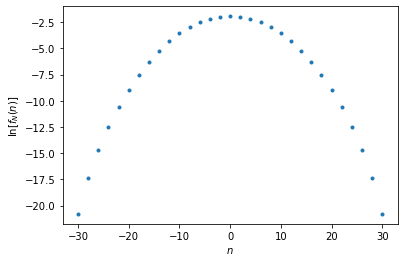

In [88]:
plt.plot(Nlist,np.log(probability_list),'.')
plt.xlabel(r"$n$")
plt.ylabel(r"$\ln [f_N(n)]$")
plt.show()

This looks a lot like a parabola — and it is! Well, to be precise, the logarithm of the probability distribution tends to a parabola as  $N$ becomes large, provided  $n$ is much less than $N$, and in fact this is the important limit in statistical physics.  The natural log of the probability of ending the path at $n$ tends to $\ln C - n^2/2N$,  where the constant $C$ is some constant depending on $n$ and $N$, which we will find out later.

This means that the probability $f_N(n)$ is given by:
$$
f_N(n) = C e^{-\frac{n^2}{2N}}.
$$ 

This is called a _Gaussian probability distribution_. We will come to this later. 

# Deriving the Result from Stirling's Formula
For large $N$,  the exponential dependence on $n^2$ can be derived mathematically using Stirling's formula $\ln n!\simeq n\ln n − n + \frac{1}{2}\ln 2\pi n$. We will not prove this here.

For a walk of $N$ steps, the total number of paths ending at $n$ is 
$$
\frac{N!}{((N+n)/2)!((N-n)/2)!}
$$

To find the probability $f_N(n)$ we took one of these paths, we divide by the number of all possible paths, which is $2^N$.

Applying Stirling’s formula
$$
\begin{align}
\ln f_N(n) &= \ln \left(\frac{N!}{((N+n)/2)!((N-n)/2)!} \cdot \frac{1}{2^N}\right) \\
&\simeq N\ln N - N - \left(\frac{N+n}{2}\right)\ln \left(\frac{N+n}{2}\right) + \left(\frac{N+n}{2}\right)  \\
&- \left(\frac{N-n}{2}\right)\ln \left(\frac{N-n}{2}\right) + \left(\frac{N-n}{2}\right) - N \ln 2 + \frac{1}{2}\ln\left(\frac{2\pi N}{\pi^2(N^2 - n^2)}\right) \\
& = N \ln N - \left(\frac{N+n}{2}\right)\ln \left(\frac{N+n}{2}\right) - \left(\frac{N-n}{2}\right)\ln \left(\frac{N-n}{2}\right) - N \ln 2 + \ln \frac{2}{\sqrt{2\pi (N - \frac{n^2}{N})}}.
\end{align}
$$  
We shall then using another approximating formula, 
$$
\ln (1 \pm x) \simeq \pm x  - x^2/2 
$$
for small $x$.
This leads to 
$$
\ln \left(\frac{N \pm n}{2}\right) \simeq \ln \frac{N}{2} + \ln\left(1\pm \frac{n}{N} \right)
\simeq \ln \frac{N}{2} \pm \frac{n}{N} - \frac{1}{2}\left(\frac{n}{N}\right)^2.
$$

Thus, we have
$$
\begin{align}
\ln f_N(n) &\simeq N \ln N - \left(\frac{N+n}{2}\right)(\ln \frac{N}{2} + \frac{n}{N} - \frac{1}{2}\left(\frac{n}{N}\right)^2) - \left(\frac{N-n}{2}\right)(\ln \frac{N}{2} - \frac{n}{N} - \frac{1}{2}\left(\frac{n}{N}\right)^2) - N \ln 2 +  \ln \frac{2}{\sqrt{2\pi N}}\\
&= N\ln N - N\left(\ln N - \ln 2 - \frac{1}{2}\frac{n^2}{N^2}\right) - \frac{n^2}{N} - N\ln 2 +  \ln \frac{2}{\sqrt{2\pi N}} \\
&= -\frac{n^2}{2N} +  \ln \frac{2}{\sqrt{2\pi N}}.
\end{align}
$$
This proves the observation that the natural logarithm of the probability is quadratic in $n$ with a constant. 

Hence, we can write, for large $N$ and $N \gg n$,
$$
f_N(n) = \frac{2}{\sqrt{2\pi N}}e^{-\frac{n^2}{2N}}.
$$


# Simulating the probabilities
In the following python code, we simulate the probabilities $f_N(n)$, by simulation:
- We take `Nwalker` number of walkers. Each walker moves according to the random walk algorithm. 
- For each walker, we simulate the end point of the walker after `Nstep` steps. 
- We count the frequencies for landing at each positions, and compute the corresponding probabilities. 
- You can see the simulated probabilities agrees with the Gaussian distribution!

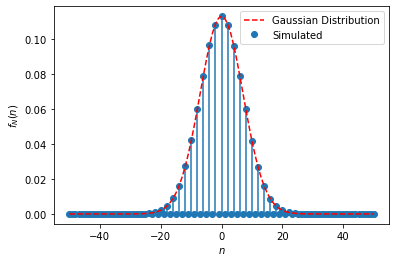

In [52]:
import numpy as np
import matplotlib.pyplot as plt
def Randomwalk1D(Nstep, Nwalker): #N here is the no. of steps that we require
    x = np.zeros(Nwalker,dtype = int)
    for i in range (1,Nstep+1):
        step = np.random.rand(Nwalker)
        forward_ids = step<0.5
        backward_ids = ~forward_ids
        x[forward_ids] += 1
        x[backward_ids] -= 1 
    return x

def stat_prob(x,Nstep):
    return np.bincount(x+Nstep,minlength=2*Nstep+1)/len(x)

Nstep = 50
Nwalker = 1000000
gaussian_dist = 2/(np.sqrt(2*np.pi*Nstep))*np.exp(-nlist**2/(2*Nstep))
nlist = np.arange(-Nstep,Nstep+1)
x = Randomwalk1D(Nstep,Nwalker)
probabilities = stat_prob(x,Nstep)
markerline, stemlines, baseline = plt.stem(nlist,probabilities,label='Simulated')
plt.plot(nlist,gaussian_dist,'r--',label='Gaussian Distribution')
plt.setp(baseline,linewidth=0)
plt.xlabel(r"$n$")
plt.ylabel(r"$f_N(n)$")
plt.legend()
plt.show()

# How Far Away Should You Expect?
Since forward and backward steps are equally likely at all times, the expected average finishing position must be back at the origin. The interesting question is how far away from the origin, on average, we can expect to land, _regardless of direction_. To get rid of the direction, we compute the expected value of the square of the landing distance from the origin, the "mean square" distance, then take its square root.  _This is called the "root mean square" or rms distance_.

For example, taking the probabilities for the five step walk from the figure above, and adding together $+5$ with  $-5$, etc., we find the expectation value of $n^2$ is:
$$
2 \times 1/32 \times 5^2 + 2 \times 5/32 \times 3^2 + 2 \times 10/32 \times 1^2 = 5.
$$
That is, the rms distance from the origin after $5$ steps is $\sqrt{5}$.

**The root mean square distance from the origin after a random walk of $N$ unit steps is $\sqrt{N}$.**

A neat way to prove this for any number of steps is to introduce the idea of a _random variable_.  If  $x_1$  is such a variable, it takes the value $+1$ or  $-1$ with equal likelihood each time we check it.  In other words, if you ask me "What’s the value of $x_1$ ?" I flip a coin, and reply "+1" if it's heads, "-1" if it's tails. On the other hand, if you ask me "What's the value of  $x_1^2$ ?"  I can immediately say "1" without bothering to flip a coin.  We use brackets $\langle \cdot \rangle$ to denote averages (that is, expectation values) so  $\langle x_1\rangle =0$,  (for an unbiased coin),  $\langle x_1^2\rangle=1$.  

The endpoint of a random walk of $N$ steps can be written as a sum of $N$ such random variables:
$$
\mathrm{path \  endpoint} = x_1 + x_2 + \dots + x_N. 
$$
The average value, or _the expectation value_, of the square of the path length is
$$
\langle  (x_1 + x_2 + \dots + x_N)^2 \rangle = \langle (\sum_{i=1}^N x_i )(\sum_{j=1}^N x_j)\rangle = \sum_{ij}\langle x_i x_j \rangle.
$$
This means we can write the expectation value of the square of the path length as a sum over all possible pairs $\langle x_i x_j \rangle$.
- If $i = j$, these terms are $\langle x_i^2 \rangle = 1$. 
- If $i \neq j$, since $x_i$ and $x_j$ are independent, the product $x_i x_j$ can take either $1$ or $-1$ with equal probabilities. Thus, the expectation value is zero in these cases.

Hence, we can write
$$
\langle  (x_1 + x_2 + \dots + x_N)^2 \rangle = \sum_{i=1}^N \langle x_i^2\rangle = N.
$$
**It follows that the rms deviation is $\sqrt{N}$ in the general case.**

# Example: Density Fluctuations in a Small Volume of Gas
Suppose we have a small box containing $N$ molecules of gas.  We assume any interaction between the molecules is negligible, they are bouncing around inside the box independently.

If at some instant we insert a partition down the exact middle of the box, we expect on average to find 50% of the molecules to be in the right-hand half of the box.

The question is: how close to $50\%$?  How much deviation are we likely to see?  Is $51\%$ very unlikely?

Since the $N$ molecules are moving about the box in a random fashion, we can assign a random variable  $y_n$  to each molecule, where  $y_n=1$  if the  $n$-th  molecule is in the right hand half,  $y_n=0$  if the  $n$-th  molecule is in the left-hand half of the box, and the values 1 and 0 are equally probable. The total number of molecules $N_R$  in the right-hand half of the box is then:
$$
N_R = y_1 + y_2 + \dots + y_N.
$$
This sum of $N$ random variables looks a lot like the random walk! In fact, the two are equivalent.  Define a random variable $x_n$  by:
$$
y_n = \frac{1}{2}(1 + x_n).
$$

Since  $y_n$  takes the values 0 and 1 with equal probability,  $x_n$  takes the values -1 and +1 with equal probability -- so  $x_n$  is identical to our random walk one-step variable above. Therefore, $N_R = y_1 + y_2 + \dots + y_N  = \frac{N}{2} + x_1 + x_2 + \dots x_N$.

We see that 
$$
\langle N_R \rangle  = \frac{N}{2}.
$$
Moreover, we introduce the _variance_,
$$
\langle (N_R - N/2)^2 \rangle = N.
$$

The fluctuation near the expectation values is can be thought as the square root of the variance, namely
$$
\sqrt{\langle (N_R - N/2)^2 \rangle} = \sqrt{N}.
$$
As $N$ becomes larger and larger, the relative fluctuation $\sqrt{N}/(N/2) \to 0$!